# Data Preprocessing

### Importing libraries and modules 

In [619]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.linear_model import  LogisticRegression

#### Loading dataset from sklearn library 

In [640]:
from sklearn.datasets import load_iris
iris=load_iris()

In [641]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [642]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [643]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [644]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [645]:
#converting dataset to dataframe
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [651]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As we can see above data distribution of data points in each class is equal so Iris is a balanced dataset as the number of data points for every class is 50.

In [654]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

The data set has three varities of Iris plant.

In [657]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

So there is no null value

#### Loading dataset from csv file 

In [646]:
data= pd.read_csv('C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data.csv')

In [647]:
#loading first five rows
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [648]:
#numerical summary of each attribute through describe() function
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
#checking class distribution using groupby and size
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [19]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)

We split the dataset into a training set and a test set.I used a stratified hold-out approach to estimate model accuracy. 
Hold-out is when you split up your dataset into a ‘train’ and ‘test’ set. The training set is what the model is trained on, and the test set is used to see how well that model performs on unseen data. A common split when using the hold-out method is using 80% of data for training and the remaining 20% of the data for testing.

I set 40 percent of data to be the test set to ensure there are enough data points to test the models.

# Data Visualization

####  x = sepal length  y = sepal width 

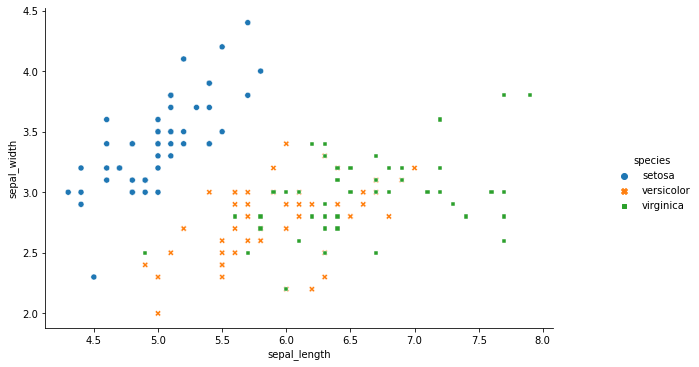

In [661]:
g=sns.relplot(x='sepal_length',y='sepal_width',data=data,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

#### x = petal length y = petal width

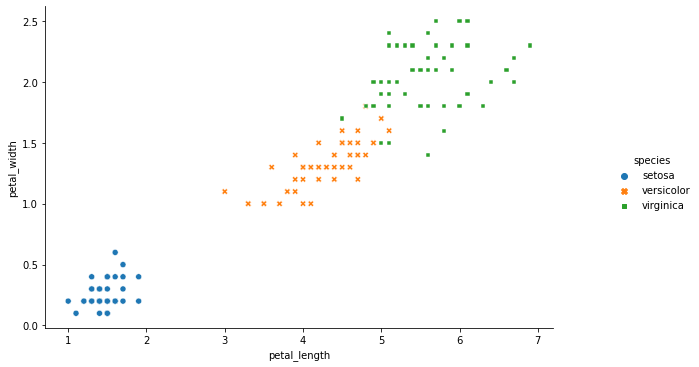

In [663]:
g=sns.relplot(x='petal_length',y='petal_width',data=data,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal.

### Univariate Plots

#### HISTOGRAM PLOT 

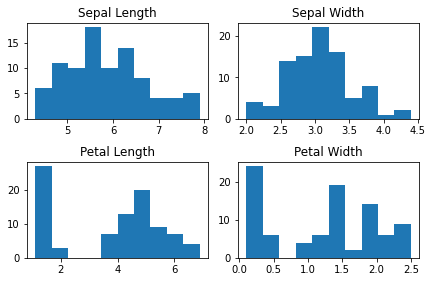

In [20]:
# histograms
n_bins = 10# set the number of bars in histogram
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# add some spacing between subplots
fig.tight_layout(pad=1.0);

#### BOX PLOT 

for both petal_length and petal_width, there seems to be a group of data points that have smaller values than the others, suggesting that there might be different groups in this data.

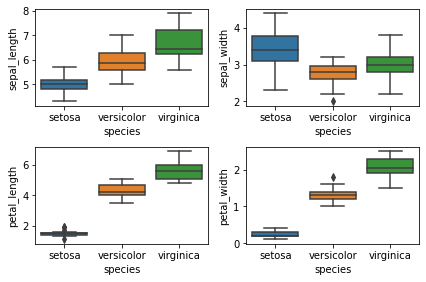

In [21]:
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

The two plots at the bottom suggest that that group of data points we saw earlier are setosas. Their petal measurements are smaller and less spread-out than those of the other two species as well. Comparing the other two species, versicolor has lower values than virginica on average.

#### VIOLIN PLOT 

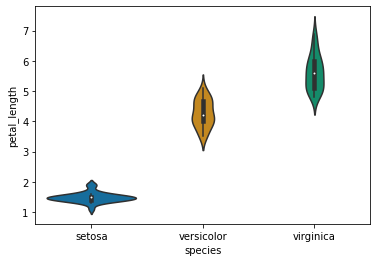

In [22]:
sns.violinplot(x="species", y="petal_length", data=train, size=5, order = cn, palette = 'colorblind');

Violin plot is another type of visualization, which combines the benefit of both histogram and box plot

### Scatterplots of all-paired attributes by using seaborn's pairplot function

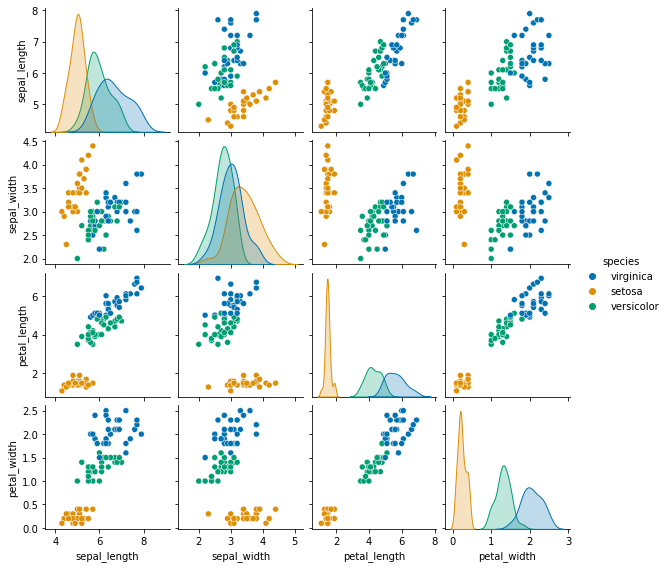

In [23]:
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind');

We see that some variables seem to be highly correlated, e.g. petal_length and petal_width. In addition, the petal measurements separate the different species better than the sepal ones.

#### CORRELATION MATRIX 

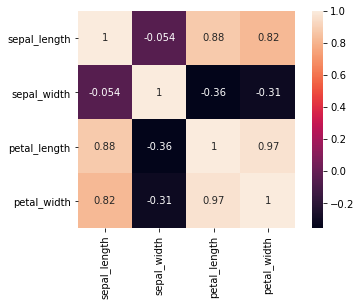

In [24]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

The main takeaway is that the petal measurements have highly positive correlation, while the sepal one are uncorrelated. Note that the petal features also have relatively high correlation with sepal_length, but not with sepal_width.

#### PARALLAL CO-ORDINATE PLOT 

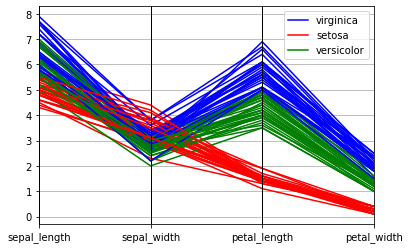

In [25]:
parallel_coordinates(train, "species", color = ['blue', 'red', 'green']);

As we have seen before, petal measurements can separate species better than the sepal ones.

# CLASSIFICATION

### Splitting the dataset into training and testing set using train_test_split function that comes with scikit learn 

In [581]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris['data'],iris['target'],test_size=0.4,random_state=42)

In [582]:
X_train.shape

(90, 4)

In [583]:
X_test.shape

(60, 4)

## KNearestNeighbor (KNN algorithm)

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

In [584]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [585]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#### CHECKING ACCURACY OF KNN ON TRAIN DATA

In [586]:
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

95.56

#### CHECKING ACCURACY OF  ON TEST DATA

In [587]:
prediction_knn=knn.predict(X_test)


In [588]:
prediction_knn = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,prediction_knn)* 100, 2)
print('The accuracy of the KNN Classifier is',accuracy_knn)

The accuracy of the KNN Classifier is 98.33


In [589]:
con_m = confusion_matrix(y_test, prediction_knn)
con_m

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 17]], dtype=int64)

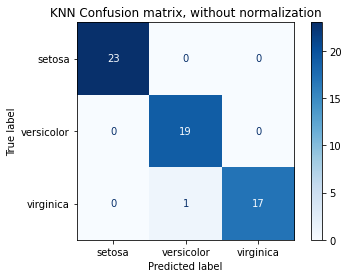

In [590]:
# confusion matrix
# one verginica misclassified
conm_knn = metrics.plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
conm_knn.ax_.set_title('KNN Confusion matrix, without normalization');

#### TAKING UNKOWN DATA TO PREDICT

In [591]:
X_new=np.array([[5,2.9,1,0.2]])
X_new.shape

(1, 4)

#### MAKING PREDICTIONS

In [592]:
predictions=knn.predict(X_new)
print(predictions)

[0]


In [593]:
iris['target_names'][predictions]

array(['setosa'], dtype='<U10')

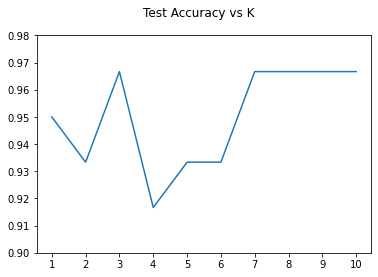

In [594]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)
# Model development
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species
# try different k
acc_s = pd.Series(dtype = 'float')
for i in list(range(1,11)):
    mod_knn=KNeighborsClassifier(n_neighbors=i) 
    mod_knn.fit(X_train,y_train)
    prediction=mod_knn.predict(X_test)
    acc_s = acc_s.append(pd.Series(metrics.accuracy_score(prediction,y_test)))  
plt.plot(list(range(1,11)), acc_s)
plt.suptitle("Test Accuracy vs K")
plt.xticks(list(range(1,11)))
plt.ylim(0.9,0.98);

## DECISION TREE 

In [595]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
x=iris.data
y=iris.target
tree_clf=DecisionTreeClassifier()

In [596]:
model=tree_clf.fit(X_train,y_train)

#### CHECKING ACCURACY OF DECISION TREE CLASSIFIER ON TRAIN DATA 

In [597]:
acc_decision_tree = round(model.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)

100.0


#### CHECKING ACCURACY OF DECISION TREE CLASSIFIER ON TEST DATA

In [598]:
prediction_dt=model.predict(X_test)
accuracy_dt=round(accuracy_score(prediction_dt,y_test)*100,2)
accuracy_dt

91.67

In [599]:
print('The accuracy of the Decision Tree is',accuracy_dt)

The accuracy of the Decision Tree is 91.67


#### MAKING PREDICTIONS ON UNKNOWN DATA

In [600]:
pro=tree_clf.predict_proba([[5,2.9,1,0.2]])
pro

array([[1., 0., 0.]])

In [601]:
result=np.where(pro[0]==1)
print(result)

(array([0], dtype=int64),)


In [602]:
iris['target_names'][result]

array(['setosa'], dtype='<U10')

#### VISUALIZATION OF DECISION TREE CLASSIFICATION RULES

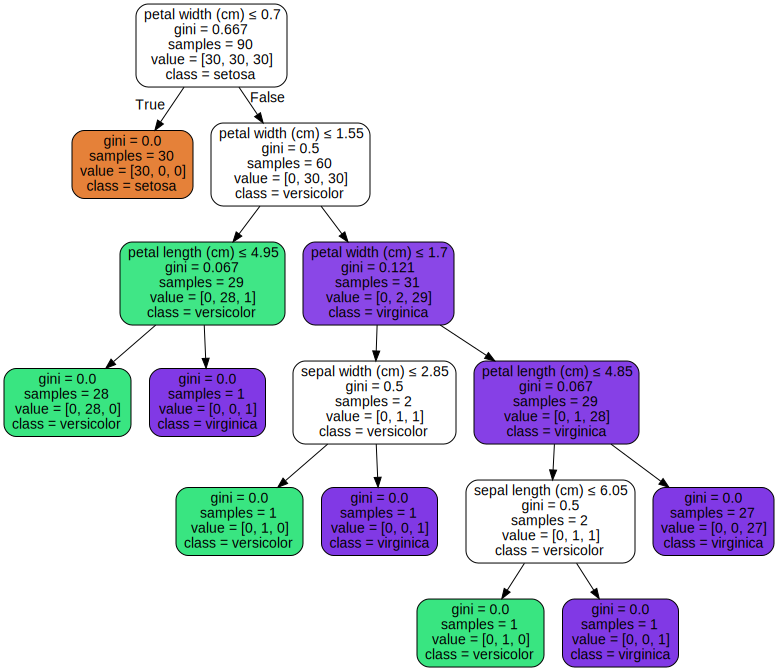

In [603]:
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)
graph

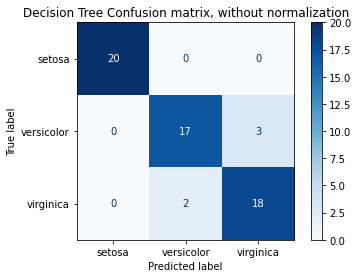

In [604]:
# confusion matrix
# 3 versicolor and two viginica misclassified
disp = metrics.plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

3 versicolor and 2 viginica misclassified

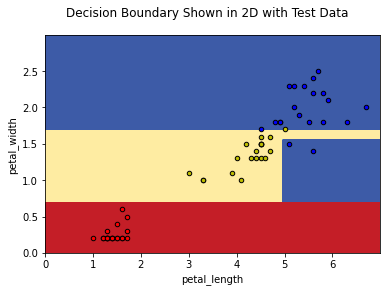

In [605]:
# Model development
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

# plot decision boundary for petal width vs petal length
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)
    
plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");    

To demonstrate how easy it is to classify new data points, say a new instance has a petal length of 4.5cm and a petal width of 1.5cm, then we can predict it to be versicolor following the rules.
Since only the petal features are being used, we can visualize the decision boundary and plot the test data in 2D:


## Naive Bayes Classifier

In [606]:
#train, test = train_test_split(data, test_size = 0.2, stratify = data['species'], random_state = 42)
#X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
#y_train = train.species
#X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
#y_test = test.species

# Guassian Naive Bayes Classifier
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)


GaussianNB()

#### CHECKING ACCURACY OF NAIVE BAYES CLASSIFIER ON TRAIN DATA

In [607]:
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

97.78

#### CHECKING ACCURACY OF NAIVE BAYES CLASSIFIER ON TEST DATA

In [608]:
Y_pred = gaussian.predict(X_test)
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
print(accuracy_nb)
print('The accuracy of the Guassian Naive Bayes Classifier on test data is',accuracy_nb)

93.33
The accuracy of the Guassian Naive Bayes Classifier on test data is 93.33


#### MAKING PREDICTIONS ON UNKNOWN DATA

In [625]:
pro=gaussian.predict_proba([[5,2.9,1,0.2]])
result=np.where(pro[0]==1)
print(iris['target_names'][result])

['setosa']


##  LDA Classifier

In [610]:
# LDA Classifier
mod_lda_all = LinearDiscriminantAnalysis()
y_pred_lda = mod_lda_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the LDA Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred_lda,y_test)))

The accuracy of the LDA Classifier on test data is 0.983


#### CHECKING ACCURACY OF NAIVE BAYES CLASSIFIER ON TRAIN DATA 

In [666]:
acc_lda = round(mod_lda_all.score(X_train, y_train) * 100, 2)
acc_lda

97.78

#### CHECKING ACCURACY OF NAIVE BAYES CLASSIFIER ON TEST DATA 

In [667]:
accuracy_lda=round(accuracy_score(y_pred_lda,y_test)*100,2)
accuracy_lda

93.33

#### TESTING ON UNKNOWN DATA 

In [626]:
pro=mod_lda_all.predict_proba([[5,2.9,1,0.2]])
result=np.where(pro[0]==1)
print(iris['target_names'][result])

['setosa']


## RANDOM FOREST 

In [613]:
from sklearn.ensemble import RandomForestClassifier

In [614]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

#### CHECKING ACCURACY OF NAIVE BAYES CLASSIFIER ON TEST DATA

In [615]:
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
accuracy_rf

91.67

#### CHECKING ACCURACY OF NAIVE BAYES CLASSIFIER ON TRAIN DATA

In [616]:
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

#### TESTING ON UNKNOWN DATA 

In [627]:
pro=random_forest.predict_proba([[5,2.9,1,0.2]])
result=np.where(pro[0]==1)
print(iris['target_names'][result])

['setosa']


## Logistic Regression 

In [621]:
from sklearn.linear_model import  LogisticRegression
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

####  CHECKING ACCURACY OF NAIVE BAYES CLASSIFIER ON TRAIN DATA

In [622]:
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

96.67

#### CHECKING ACCURACY OF NAIVE BAYES CLASSIFIER ON TEST DATA 

In [623]:
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
accuracy_lr

95.0

#### PREDICTING ON UNKNOWN DATA 

In [633]:
pro=logreg.predict([[5,2.9,1,0.2]])
pro

array(['setosa'], dtype=object)

## Support Vector Machine 

In [634]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)

In [635]:
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
accuracy_svc

93.33

In [636]:

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

95.56

In [637]:
pro=linear_svc.predict([[5,2.9,1,0.2]])
pro

array(['setosa'], dtype=object)

# Comparitive analysis on different classifiers used

## Which is the best Model ?

In [682]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Logistic Regression', 
              'Random Forest',
              'Naive Bayes',  
              ' Support Vector Machine', 
              'Decision Tree',
              'Linear Disciminant Analysis'],
    'Score': [ acc_knn,
              acc_log, 
              acc_random_forest,
              acc_gaussian,  
              acc_linear_svc,
              acc_decision_tree,
              acc_lda],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_dt,
                      accuracy_lda]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(10)

,Model,Score,Accuracy_score
0,KNN,95.56,98.33
1,Logistic Regression,96.67,95.00
2,Naive Bayes,97.78,93.33
3,Support Vector Machine,95.56,93.33
4,Linear Disciminant Analysis,97.78,93.33
5,Random Forest,100.00,91.67
6,Decision Tree,100.00,91.67


As we see best Model is given by K Nearest Neighbor(98.33% Accuracy).

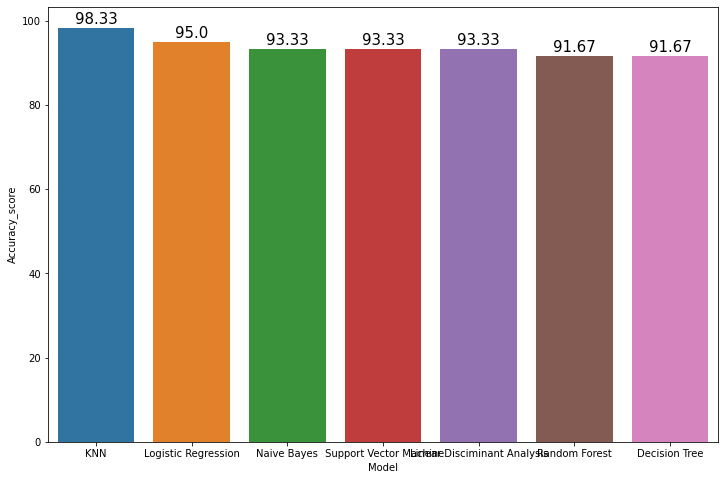

In [684]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high. Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features.